# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [51]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

AttributeError: module 'numpy' has no attribute '_no_nep50_warning'

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

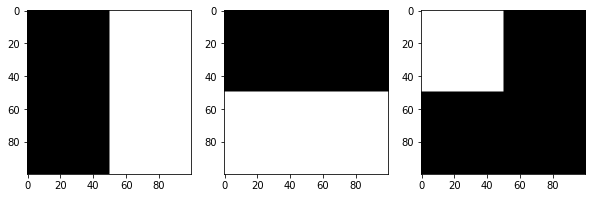

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


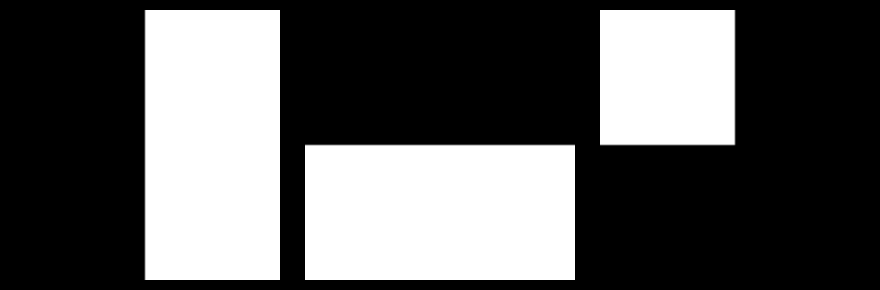

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create the patterns
patterns = [
    np.block([[np.zeros((100, 50)), np.ones((100, 50))]]),  
    np.block([[np.zeros((50, 100))], [np.ones((50, 100))]]),  
    np.block([[np.ones((50, 50)), np.zeros((50, 50))], [np.zeros((50, 100))]])# Top-left corner
]


# Plot the corrected patterns
fig, axes = plt.subplots(1, 3, figsize=(9, 3), facecolor='black')

for ax, pattern in zip(axes, patterns):
    ax.imshow(pattern, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()




*   Use the above three images to create the following image

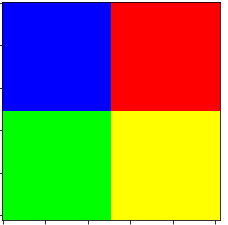
*Hint: Remember channels and color spaces*

In [11]:
# Create the new composite image from the previously defined patterns
from PIL import Image

# Define individual components as PIL images
vertical_split = Image.fromarray((patterns[0] * 255).astype('uint8')).convert('L')
horizontal_split = Image.fromarray((patterns[1] * 255).astype('uint8')).convert('L')
top_left_corner = Image.fromarray((patterns[2] * 255).astype('uint8')).convert('L')

# empty RGB image
composite_image = Image.new("RGB", (100, 100))

# Define color mappings for each pattern
blue = (0, 0, 255)       # Blue
red = (255, 0, 0)        # Red
green = (0, 255, 0)      # Green
yellow = (255, 255, 0)   # Yellow

# Assign colors based on patterns
for x in range(100):
    for y in range(100):
        if vertical_split.getpixel((x, y)) == 255 and horizontal_split.getpixel((x, y)) == 0:
            composite_image.putpixel((x, y), red) # Top-right 
        elif top_left_corner.getpixel((x, y)) == 255:
            composite_image.putpixel((x, y), blue) # Top-left
            
            
        elif vertical_split.getpixel((x, y)) == 255 and horizontal_split.getpixel((x, y)) == 255:
             composite_image.putpixel((x, y), yellow)  # Bottom-right

            
        else:
            # composite_image.putpixel((x, y), yellow)  # Bottom-right
            composite_image.putpixel((x, y), green)

# Display the final composite image
composite_image.show()




### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

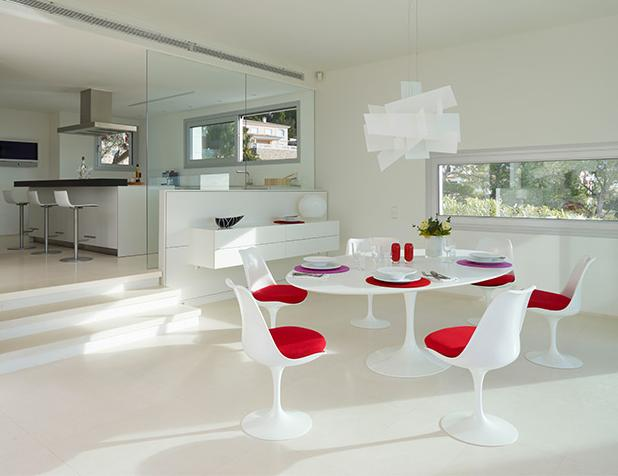

*   Extract individual channels and plot them using matplotlib subplot.



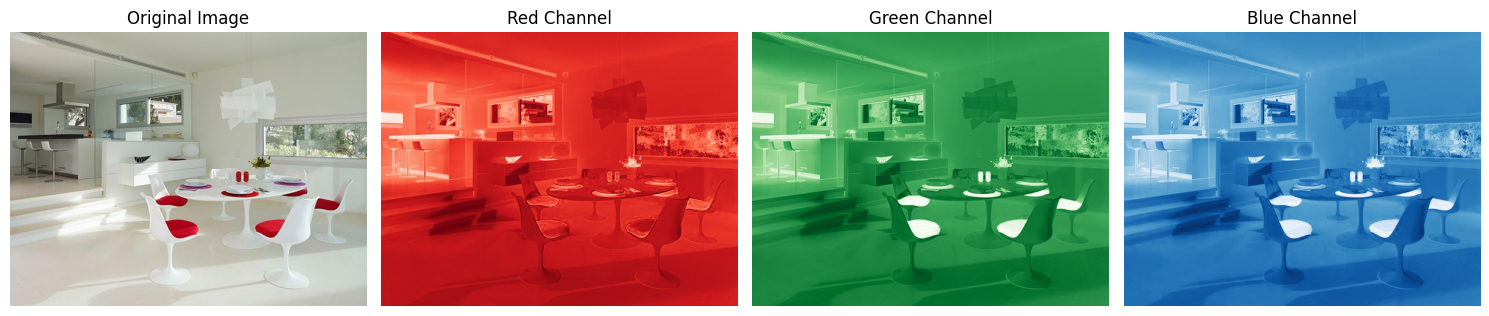

In [ ]:
from matplotlib import pyplot as plt
# C:\Users\dbigman\OneDrive - SUDOC LLC\Desktop\GitHub\Ironhack_bootcamp\lab-computer-vision\images\sillas.jpg
# Load a sample JPG image
sample_image_path = r"images\sillas.jpg"

image = Image.open(sample_image_path).convert('RGB')

# Extract individual channels
red_channel, green_channel, blue_channel = image.split()

# Plot the channels
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Display the original image
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Display the Red channel
axes[1].imshow(red_channel, cmap='Reds')
axes[1].set_title("Red Channel")
axes[1].axis("off")

# Display the Green channel
axes[2].imshow(green_channel, cmap='Greens')
axes[2].set_title("Green Channel")
axes[2].axis("off")

# Display the Blue channel
axes[3].imshow(blue_channel, cmap='Blues')
axes[3].set_title("Blue Channel")
axes[3].axis("off")

plt.tight_layout()
plt.show()



*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

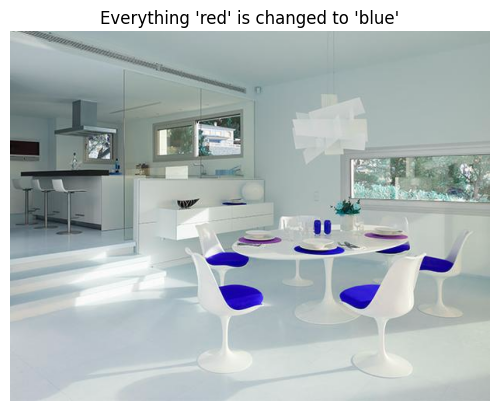

In [19]:
# Open the original image again
image = Image.open(sample_image_path).convert('RGB')

# Convert the image to a numpy array for manipulation
image_array = np.array(image)

# Swap the red and blue channels
# Red is channel 0, Blue is channel 2
image_array[:, :, [0, 2]] = image_array[:, :, [2, 0]]

# Convert back to an image
swapped_image = Image.fromarray(image_array)

# Display the modified image
plt.imshow(swapped_image)
plt.title("Everything 'red' is changed to 'blue'")
plt.axis("off")
plt.show()



# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

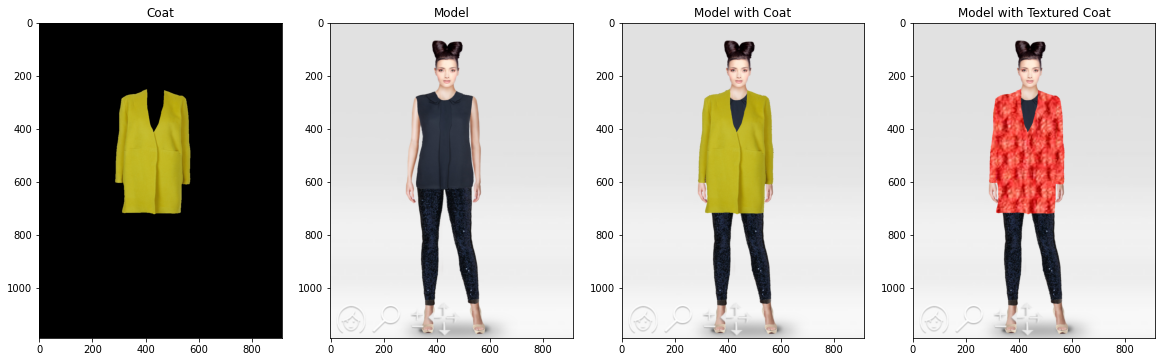

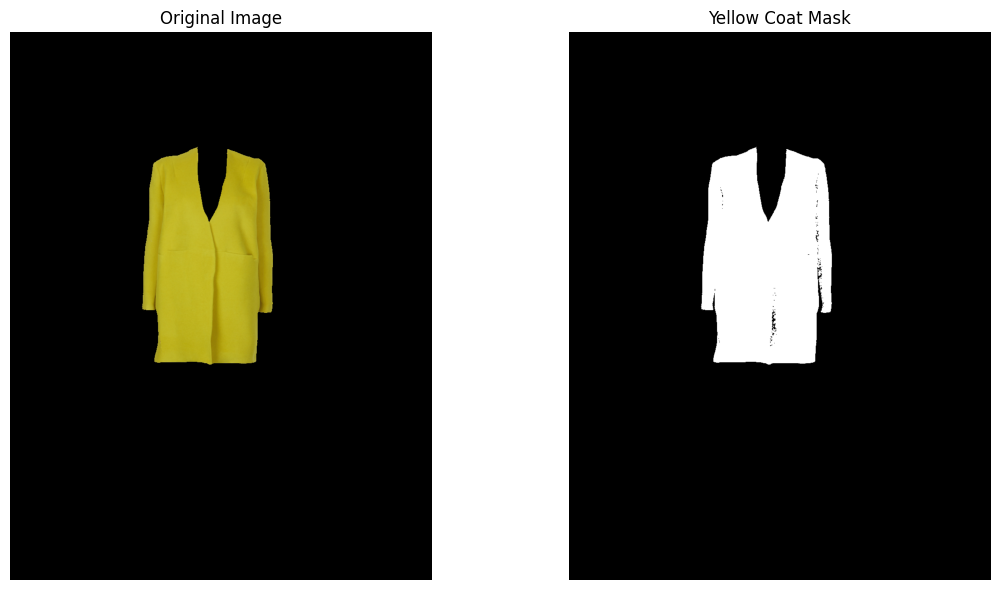

In [71]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv

# Load the uploaded image and convert it to RGB (remove alpha channel if present)
uploaded_image_path = "images\coat.png"
yellow_coat_image = Image.open(uploaded_image_path).convert('RGB')

# Convert the image to a NumPy array
coat_rgb_array = np.array(yellow_coat_image, dtype=float) / 255.0  # Normalize to [0, 1]

# Convert the RGB image to HSV for color-based masking
coat_hsv = rgb_to_hsv(coat_rgb_array)

# typical HSV values for yellow
yellow_hsv = {
    "hue_min": 0.14,  # Minimum Hue (normalized)
    "hue_max": 0.20,  # Maximum Hue (normalized)
    "saturation_min": 0.4,  # Minimum Saturation (normalized)
    "value_min": 0.5,  # Minimum Value (normalized)
}

yellow_mask = (
    (coat_hsv[:, :, 0] > yellow_hsv["hue_min"]) & (coat_hsv[:, :, 0] < yellow_hsv["hue_max"]) &
    (coat_hsv[:, :, 1] > yellow_hsv["saturation_min"]) &
    (coat_hsv[:, :, 2] > yellow_hsv["value_min"])
)

# Plot the original image and the mask
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axes[0].imshow(yellow_coat_image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Yellow mask
axes[1].imshow(yellow_mask, cmap='gray')
axes[1].set_title("Yellow Coat Mask")
axes[1].axis("off")

plt.tight_layout()
plt.show()


In [89]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the model image
model_image_path = "images\model.png"
coat_image_path = "images\coat.png"
coat_image = Image.open(coat_image_path).convert("RGBA")
model_image = Image.open(model_image_path).convert("RGBA")


# Convert the coat image to a NumPy array
coat_array = np.array(coat_image)

# Define a threshold to create a mask (assuming the coat is yellow)
# Adjust thresholds based on your coat's color
lower_bound = np.array([200, 200, 0, 0])  # Lower bound for yellow (RGBA)
upper_bound = np.array([255, 255, 150, 255])  # Upper bound for yellow (RGBA)

coat_resized = coat_image.resize(model_image.size)  # Resize coat to match model size

# yellow_mask_resized = Image.fromarray((yellow_mask * 255).astype(np.uint8)).resize(model_image.size)
# yellow_mask_resized = yellow_mask_resized.point(lambda x: 255 if x > 128 else 0).convert("L")

# coat_mask = coat_resized.split()[-1]
# Create a mask by finding pixels within the color range
#coat_mask = np.all((coat_array >= lower_bound) & (coat_array <= upper_bound), axis=-1)

# Convert the mask to an image
coat_mask_image = Image.fromarray((coat_mask * 255).astype(np.uint8))


# Debug the coat mask (visualize the mask)
plt.imshow(coat_mask_image, cmap="Blues")
plt.title("Coat Mask Debug")
plt.axis("on")
plt.show()


# # Optional: Adjust the position of the coat (manually if needed)
# # Offset the coat position to fit the torso area of the model
# coat_offset = (0, 50)  # Adjust X and Y offset as needed
# coat_with_offset = Image.new("RGBA", model_image.size, (0, 0, 0, 0))
# coat_with_offset.paste(coat_resized, coat_offset, mask=coat_mask)



# # composited_image = Image.composite(coat_resized, model_image, coat_mask)
# composited_image = Image.alpha_composite(model_image, coat_with_offset)


# # Display the final result
# plt.imshow(composited_image)
# plt.title("Model Wearing Coat")
# plt.axis("off")
# plt.show()

# # Convert images to arrays
# model_array = np.array(model_image)
# mask_array = np.array(yellow_mask_resized)

# # Create overlay
# overlay_array = model_array.copy()
# overlay_array[mask_array == 255] = [255, 255, 0]  # Apply yellow where mask is active


# # Convert back to image
# overlay_image = Image.fromarray(overlay_array)

# # Display the overlaid image
# plt.imshow(overlay_image)
# plt.title("Image with Mask Overlay")
# plt.axis("on")
# plt.show()

# # Display the mask for debugging

# plt.imshow(yellow_mask_resized, cmap="gray")
# plt.title("Yellow Mask Resized")
# plt.axis("on")
# plt.show()


TypeError: unsupported operand type(s) for *: 'Image' and 'int'

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




In [ ]:
# solution



*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

In [ ]:
# solution





*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*(Double-click or enter to edit)*

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


In [ ]:
#solution



### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



In [ ]:
# solution




*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*(Double-click or enter to edit)*

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



In [ ]:
# solution



# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




In [ ]:
# solution



*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

In [ ]:
# solution



*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*(Double-click or enter to edit)*

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*(Double-click or enter to edit)*

...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

*(Double-click or enter to edit)*

...